<a href="https://colab.research.google.com/github/harrypark/harry/blob/master/tesseract_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##tesseract 설치 (한글)

In [ ]:
!sudo apt install tesseract-ocr tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-kor tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 31 not upgraded.
Need to get 5,845 kB of archives.
After this operation, 17.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-kor all 4.00~git24-0e00fe6-1.2 [1,050 kB]
Fetched 5,845 kB in 3s (2,100 kB/s)
debconf: unable to initialize

##pytesseract 설치
Pytesseract는 Tesseract-OCR Engine 용 래퍼입니다. 또한 jpeg, png, gif, bmp, tiff 등을 포함하여 Pillow 및 Leptonica 이미징 라이브러리에서 지원하는 모든 이미지 유형을 읽을 수 있으므로 tesseract에 대한 독립 실행 형 호출 스크립트로도 유용합니다. 

In [ ]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=4d3e9e30fce9af0dce84bf80c5210cdf177d4d25466beab7a611c95f6d047771
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


##tesseract 설치경로

In [ ]:
!which tesseract
!tesseract --version

/usr/bin/tesseract
tesseract 4.0.0-beta.1
 leptonica-1.75.3
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.2) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.3.0

 Found AVX2
 Found AVX
 Found SSE


##간단한 테스트
![](https://nanonets.com/blog/content/images/2019/12/image.jpg)

In [ ]:
from PIL import Image
import pytesseract
import numpy

def test_image_to_string(image):
  pytesseract.pytesseract.tesseract_cmd = (
      r'/usr/bin/tesseract'
  )
  #conv_image = '/content/drive/MyDrive/Colab Notebooks/image/test.jpg'
  #conv_image = '/content/drive/MyDrive/Colab Notebooks/image/image.jpg'
  custom_config = r'--oem 3 --psm 6'
  # --oem 3 : Default
  # --psm 6 : Assume a single uniform block of text.(단일 텍스트 블록을 가정합니다.)

  text = pytesseract.image_to_string(image, config=custom_config)
  return text

In [ ]:
import numpy
#conv_image = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/test.jpg'
conv_image = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/image.jpg'
#conv_image = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/sample/t1.jpg')
 
print(test_image_to_string(Image.open(conv_image)))

GALACTIC BASIC
(AUREBESH)
RE 7FVMVEVESItZwIoIN eZ
Aye 0 EE LE eS rn re
AOdUerT7NVYoOYoOoOAVA
N_ OP OO mR SS UT Dp Vv we ex
{8 te
1 eS ee
a a a a ee ee
2 So ee
ASaSAnNADI
CH AE EO KH NG 00 SH TH



##OpenCV
tesseract 출력 정확도를 높이기 위하여 이미지 전처리 라이브러리

크기조정(rescaling), 이진화(binarization), 노이즈 제거(noise removal), 기울기 보정(deskewing) 등이 포함됩니다.

In [ ]:
import cv2
import numpy
import matplotlib.pyplot as plt

# get grayscale image (회색조)
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding (임계점)
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation (이미지 상의 노이즈(작은 흰색 물체)를 제거하는데 사용합니다. )
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

##이미지 사전처리







#### grayscale image (회색조)

GALACTIC BASIC
(AUREBESH)
REehHTFVMVEVEITZIoIN EL
A 2S > EE eS A ek oe
AOder7NVYoYoAVaA
NOP RS Tn wee
‘ss 4 oe 8 g Pf fF f 4 mw 4
Sea
7 77 Ty
2S ys ee
ASaSAnNADI
CH AE EO KH NG OO SH TH



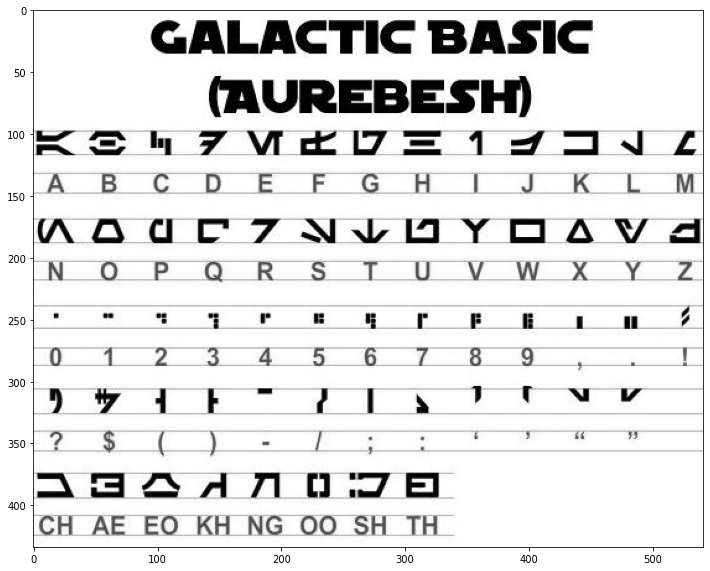

In [ ]:
image = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/image.jpg')
#image = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/sample/t1.jpg')

gray = get_grayscale(image)
plt.figure(figsize=(12, 10))
plt.imshow(gray,cmap='gray')
print(test_image_to_string(gray))


###thresholding (임계점)

GALACTIC BASIC
(AVREBESH)
RS 7FVMeEVEi1i fol Z
A B C DE F GH IJ K LM
AOdCeUT7TNVTOoOYOAVA
N OO P Q@R S$ TU VW XK Y¥ Z
"os 3 3 rm 8 fo Pf F Bo a om #
0 12 3 4 5 6 7 8 9 , . !
i A rd re
2 S$ ( Foe Fo gor ht roe
AadSANDIe
CH AE EO KH NG OO SH TH



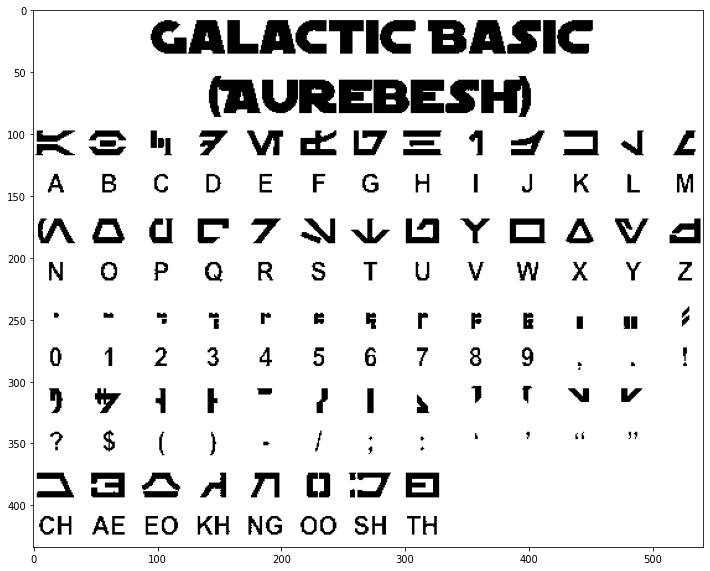

In [ ]:
thresh = thresholding(gray)
plt.figure(figsize=(12, 10))
plt.imshow(thresh,cmap='gray')
print(test_image_to_string(thresh))


###opening (이미지 상의 노이즈(작은 흰색 물체)를 제거하는데 사용합니다. )

GALACTIC BASIC
(AUREZBEILSH)
KEE VTMEUEiwoayvs
A BC D FE F @ H [| J K CL
AOadr7WTt HYOAYV 4
WO P Q R 8S T U VW WK y Z
‘5 a aor es ln lp le ce
1 2 a a4 8 8 7 Sb Ps,
VY itr-~ -yrp»pTttYY
2 ty ee eg Ee Se
AGoOAnNnoOIH
CH AE BO KH @@ OO BH TH



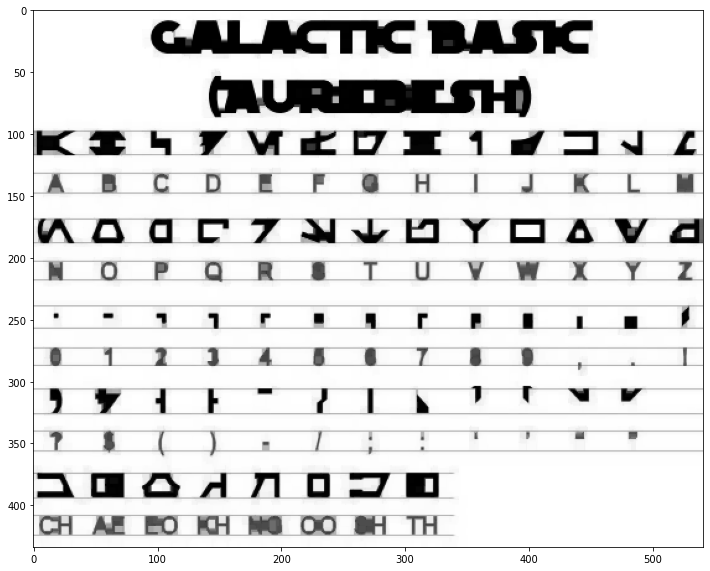

In [ ]:
import numpy as np
opening = opening(gray)
plt.figure(figsize=(12, 10))
plt.imshow(opening,cmap='gray')
print(test_image_to_string(opening))

###canny 

CAA Cnr ASG
(KUREBESE?
SA
a SS
{o_o RS a
a
a a A : rc
| A |
a
eA Ao
erm emc om Cm cuOcmc (mim



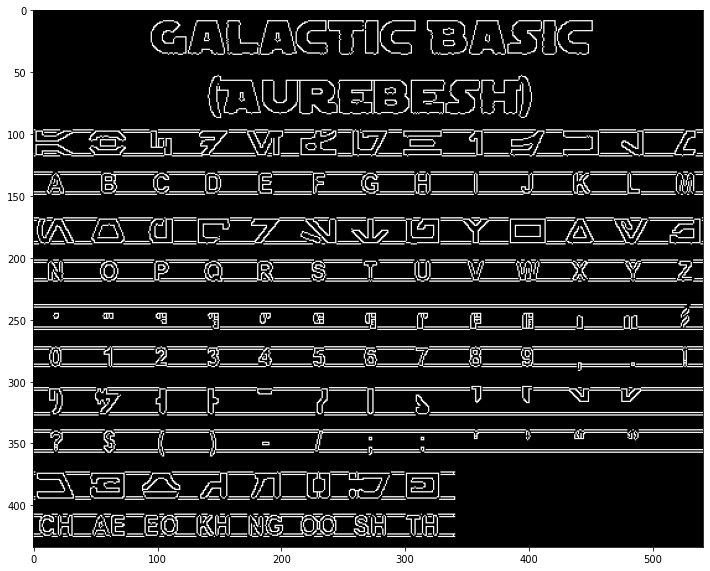

In [ ]:
canny = canny(gray)
plt.figure(figsize=(12, 10))
plt.imshow(canny,cmap='gray')
print(test_image_to_string(canny))

##텍스트 템플릿의 일치
이미지에서 날짜가있는 위치를 찾는 예를 들어 보겠습니다. 
여기서 템플릿은 적절한 경계 상자를 찾기 위해 OCR 결과와 일치시킬 정규 표현식 패턴입니다. 
이를 위해 regex모듈과 image_to_data함수를 사용합니다.

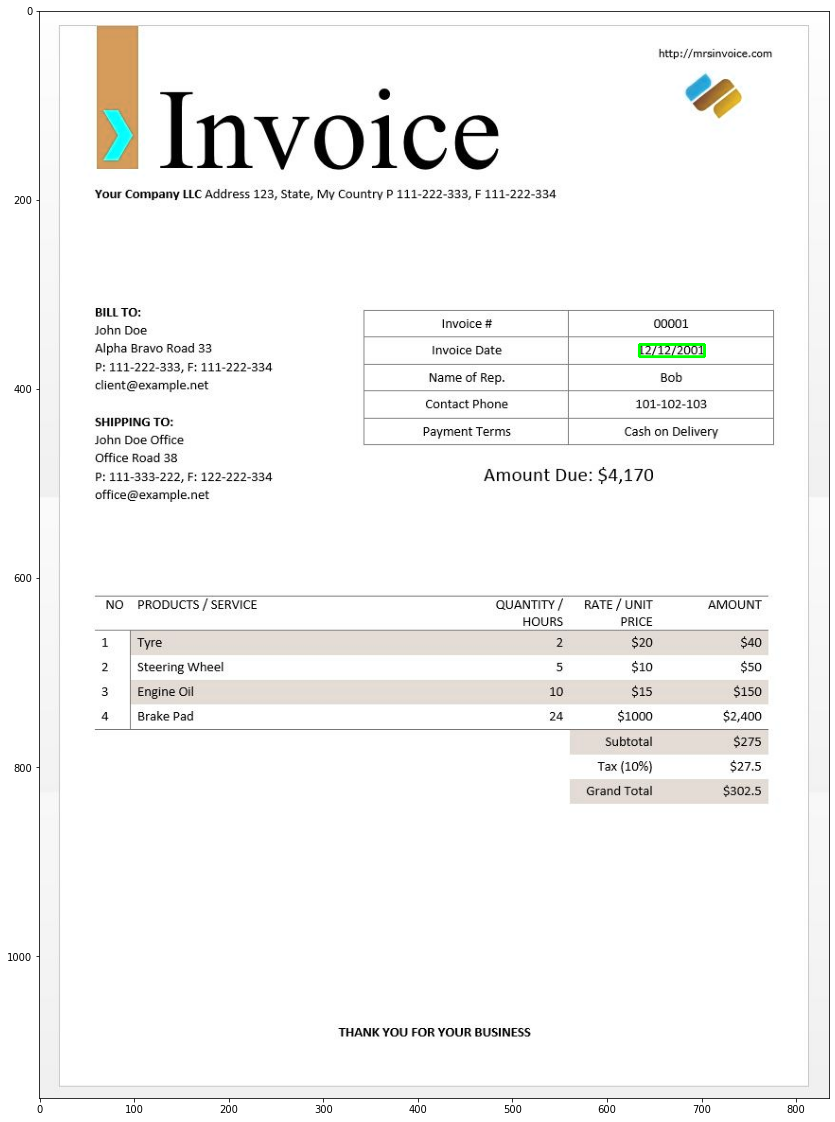

In [ ]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/invoice-sample.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    if re.match(date_pattern, d['text'][i]):
	    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(24, 20))
plt.imshow(img)

##지원언어

$ tesseract --list-langs

특정 언어 용 tesseract를 다운로드하려면

$ sudo apt-get install tesseract-ocr-LANG

여기서 LANG은 필요한 언어의 3 자리 코드입니다. 여기 에서 LANG 값을 찾을 수 있습니다 .

당신은 다운로드 할 수 있습니다 .traindata당신은에서 필요한 언어 파일 여기 와에 배치 $TESSDATA_PREFIX디렉토리 (이이 곳과 동일해야 tessdata디렉토리가 설치되어있는)하고 사용할 준비가되어 있어야합니다.

주 - .traineddata파일 형식이 있는 언어 만 tesseract에서 지원됩니다.

OCR 출력이 필요한 언어를 지정하려면 -l LANG구성에서 인수를 사용하십시오. 여기서 LANG는 사용할 언어에 대한 3 자 코드입니다.

In [ ]:
!tesseract --list-langs

List of available languages (3):
kor
osd
eng


In [ ]:
!sudo apt-get install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [ ]:
import cv2
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)
#conv_image = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/google_drive_ocr.jpg'
conv_image = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/eng_test2.jpg'
image2 = cv2.imread(conv_image)
custom_config = r'--oem 3 -l eng+kor --psm 6'
# --oem 3 : Default
# --psm 6 : Assume a single uniform block of text.(단일 텍스트 블록을 가정합니다.)

text = pytesseract.image_to_string(image2, config=custom_config)
print(text)

2021 SACHS Event!
삼성 노트북 드립니다!
Galaxy Book Flex a



##원본사진
--
컬러 사진을 OpenCV에서는 BGR 순서로 저장하는데 matplotlib에서는 RGB 순서로 저장합니다. 따라서 BGR을 RGB로 바꾸어 주어야만 사진이 제대로 표시됩니다.

출처: https://crmn.tistory.com/49 [크롬망간이 글 쓰는 공간]

Murtaza's Workshop
Robotics & Al

123456789101112131415



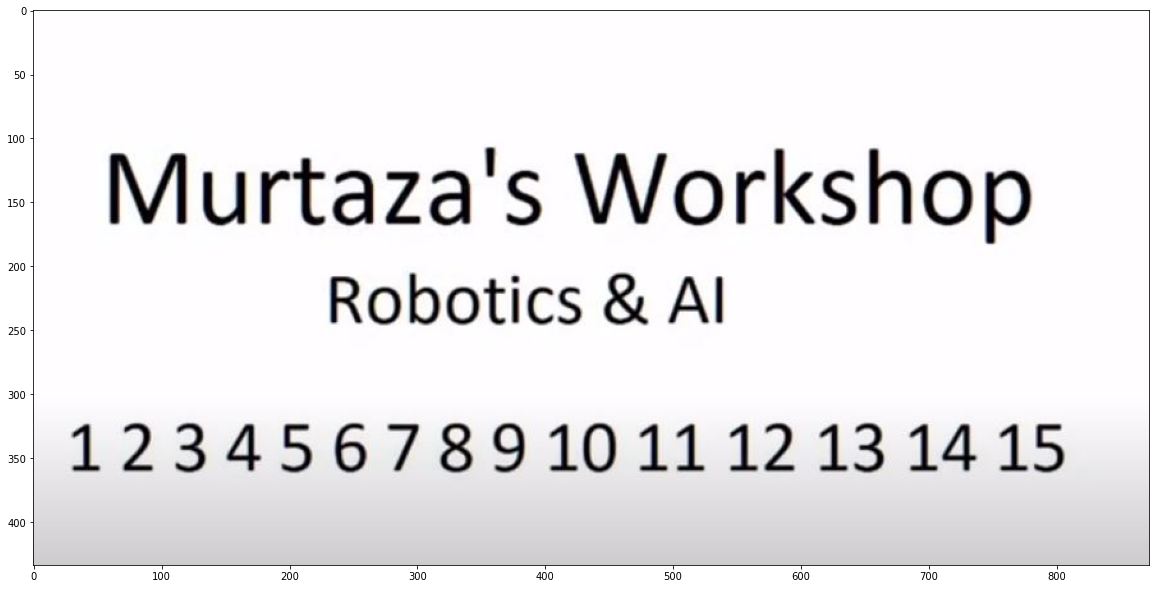

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)
org_img = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/test_img.jpg'
img = cv2.imread(org_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(img))
plt.figure(figsize=(20, 16))
plt.imshow(img,cmap='gray')

##문자의 위치 감지
---
image_to_boxes : 경계상자의 x좌표 , y좌표 , 너비, 높이 

In [ ]:
org_img = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/test_img.jpg'
img = cv2.imread(org_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_boxes(img))
#plt.figure(figsize=(20, 16))
#plt.imshow(img,cmap='gray')

M 60 267 98 322 0
u 98 267 120 322 0
r 143 266 166 307 0
t 178 266 217 318 0
a 235 266 255 308 0
z 276 267 294 307 0
a 311 266 332 308 0
' 354 303 361 327 0
s 371 266 398 308 0
W 424 267 483 322 0
o 483 267 496 322 0
r 521 266 540 308 0
k 556 267 602 325 0
s 617 266 644 308 0
h 654 267 682 325 0
o 696 266 717 308 0
p 745 251 781 308 0
R 233 189 251 226 0
o 262 188 276 217 0
b 276 188 288 217 0
o 300 188 318 228 0
t 325 188 349 217 0
i 353 188 369 224 0
c 374 189 380 226 0
s 391 188 429 217 0
& 447 188 477 228 0
A 497 189 509 226 0
l 509 189 540 226 0
1 31 74 52 110 0
2 71 74 94 111 0
3 112 73 135 111 0
4 151 74 178 110 0
5 195 72 218 110 0
6 236 73 258 111 0
7 278 74 297 110 0
8 319 72 337 111 0
9 360 72 376 111 0
1 404 74 418 110 0
0 430 72 452 111 0
1 475 74 486 110 0
1 504 74 521 110 0
1 521 74 525 110 0
2 555 74 592 111 0
1 616 74 629 110 0
3 642 72 666 111 0
1 666 72 666 111 0
4 695 74 725 110 0
1 725 74 738 110 0
5 764 73 807 110 0



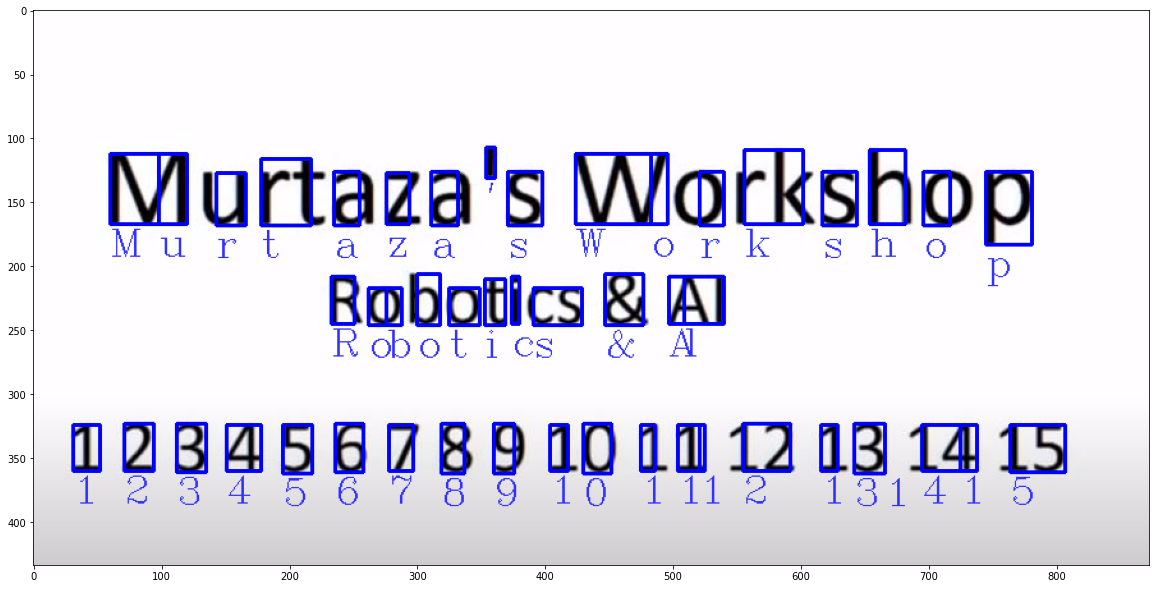

In [ ]:
org_img = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/test_img.jpg'
img = cv2.imread(org_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## Detecting Characters
hImg, wImg, _ = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b = b.split(' ')
  #print(b)  
  x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
  cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),2)
  cv2.putText(img,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255))
plt.figure(figsize=(20, 16))
plt.imshow(img,cmap='gray')


##단어위치 감지
---
image_to_data : level,	page_num,	block_num,	par_num,	line_num,	word_num,	left,	top,	width,	height,	conf,	text

In [ ]:
org_img = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/test_img.jpg'
img = cv2.imread(org_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Detecting Words
hImg, wImg, _ = img.shape
boxes = pytesseract.image_to_data(img)
print(boxes)
# for b in boxes.splitlines():
#   b = b.split(' ')
#   #print(b)  
#   x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
#   cv2.rectangle(img,(x,hImg-y),(w,hImg-h),(0,0,255),2)
#   cv2.putText(img,b[0],(x,hImg-y+25),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255))


# plt.figure(figsize=(20, 16))
# plt.imshow(img,cmap='gray')

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	873	434	-1	
2	1	1	0	0	0	60	107	721	139	-1	
3	1	1	1	0	0	60	107	721	139	-1	
4	1	1	1	1	0	60	107	721	76	-1	
5	1	1	1	1	1	60	107	338	61	91	Murtaza's
5	1	1	1	1	2	424	109	357	74	96	Workshop
4	1	1	1	2	0	233	206	307	40	-1	
5	1	1	1	2	1	233	206	196	40	92	Robotics
5	1	1	1	2	2	447	206	34	40	92	&
5	1	1	1	2	3	497	208	43	37	97	Al
2	1	2	0	0	0	31	323	776	39	-1	
3	1	2	1	0	0	31	323	776	39	-1	
4	1	2	1	1	0	31	323	776	39	-1	
5	1	2	1	1	1	31	323	776	39	90	123456789101112131415



['1', '1', '0', '0', '0', '0', '0', '0', '873', '434', '-1']
['2', '1', '1', '0', '0', '0', '60', '107', '721', '139', '-1']
['3', '1', '1', '1', '0', '0', '60', '107', '721', '139', '-1']
['4', '1', '1', '1', '1', '0', '60', '107', '721', '76', '-1']
['5', '1', '1', '1', '1', '1', '60', '107', '338', '61', '91', "Murtaza's"]
['5', '1', '1', '1', '1', '2', '424', '109', '357', '74', '96', 'Workshop']
['4', '1', '1', '1', '2', '0', '233', '206', '307', '40', '-1']
['5', '1', '1', '1', '2', '1', '233', '206', '196', '40', '92', 'Robotics']
['5', '1', '1', '1', '2', '2', '447', '206', '34', '40', '92', '&']
['5', '1', '1', '1', '2', '3', '497', '208', '43', '37', '97', 'Al']
['2', '1', '2', '0', '0', '0', '31', '323', '776', '39', '-1']
['3', '1', '2', '1', '0', '0', '31', '323', '776', '39', '-1']
['4', '1', '2', '1', '1', '0', '31', '323', '776', '39', '-1']
['5', '1', '2', '1', '1', '1', '31', '323', '776', '39', '90', '123456789101112131415']


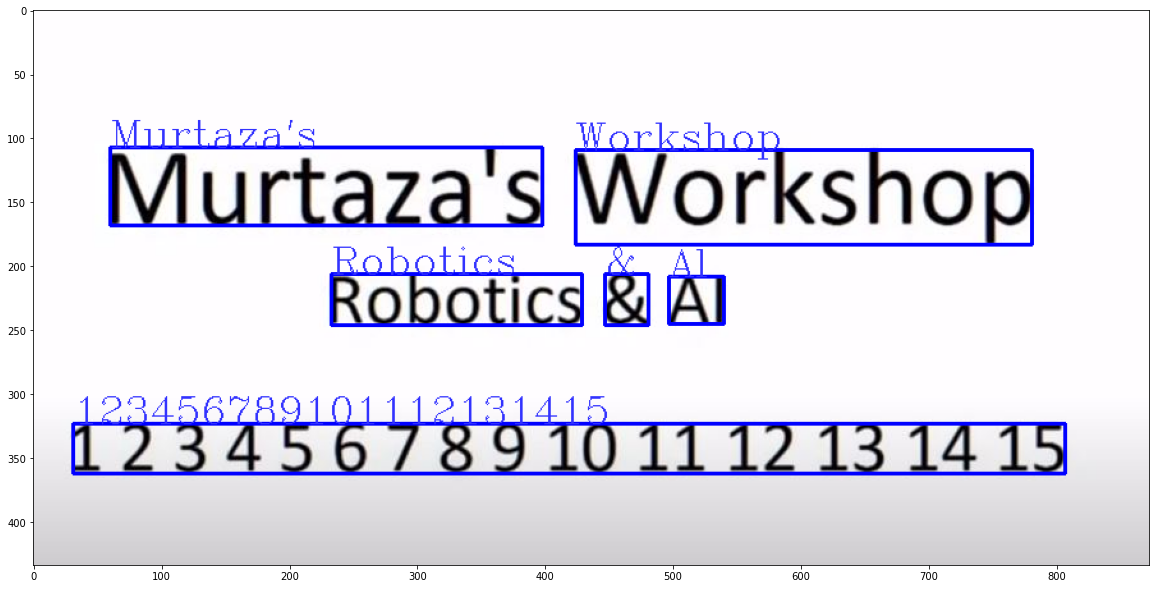

In [ ]:
org_img = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/test_img.jpg'
img = cv2.imread(org_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Detecting Words
hImg, wImg, _ = img.shape
boxes = pytesseract.image_to_data(img)

for x,b in enumerate(boxes.splitlines()):
  b = b.split()
  if x!=0:
    print(b)
    if len(b) == 12:
      x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
      cv2.rectangle(img,(x,y),(w+x,h+y),(0,0,255),2)
      cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(50,50,255))


plt.figure(figsize=(20, 16))
plt.imshow(img,cmap='gray')

##소형압연샘플 테스트 (Tesseract)

In [ ]:
from PIL import Image
import pytesseract
import cv2

def test_image_to_string(image):
  pytesseract.pytesseract.tesseract_cmd = (
      r'/usr/bin/tesseract'
  )
  #conv_image = '/content/drive/MyDrive/Colab Notebooks/image/test.jpg'
  #conv_image = '/content/drive/MyDrive/Colab Notebooks/image/image.jpg'
  custom_config = r'--oem 3 --psm 6'
  # --oem 3 : Default
  # --psm 6 : Assume a single uniform block of text.(단일 텍스트 블록을 가정합니다.)

  text = pytesseract.image_to_string(image, config=custom_config)
  return text

******************* 0 *************************
4 _ ea
me ' 4
NS 9
P a = : ‘ = @
= as a 5
oe 15
°TS41682 '
f aw 6830 a ;
ye) ae
nt. at | ss
yh a
\ ae aii |
AY ae

******************* 1 *************************
ae i E
tar
a is
x .
A 5 mi ~ Ra ‘al
A eye Se 3
aes od
_ , —
| 3
SC) hee | =
auted fein: 65 eee
(a) S Le) BE a
THe ORAS i |
sh a ae

******************* 2 *************************
oa 3 e k
ae F
, ui .
; : = ei ' ae
¢ & is @
Se ' :
Se : eae Sn t
= f ~ wes SS ee “ ¥ ae

; as 5 Pi sae 7 a

ot eee teal Gia eee Se endl
2 SS eatin eet ek a,
FDS PISO

Bo eR Ce ee
Bae te eee ee See Se
" ‘ ‘ $ < =

.
Eee x SS
hve) F's :
] ') ‘a }
Ne
: Ty
ne ae a

******************* 3 *************************
c ‘g ai s t ‘
\ oe b
a :
wR s
“a
a
as Ba
te &
ae i
apt a
a “p
( Bi e ,
i Ts, ‘a |
am
ee ai
ie Pe el = ae
+ e Bs N a ba
x i, cj ‘ xX alii,
ES ‘ a ,
et. on Ya ey a
Pe ae ; Serer agen ake
Pee bi ee -
Bed Coa. ea _
b pais ‘ STN RE es “ »
WR ry no.
ap =
8 Ry
“ ‘ thy "
8% eS La)
mo @
WM : 5
i y i n
it

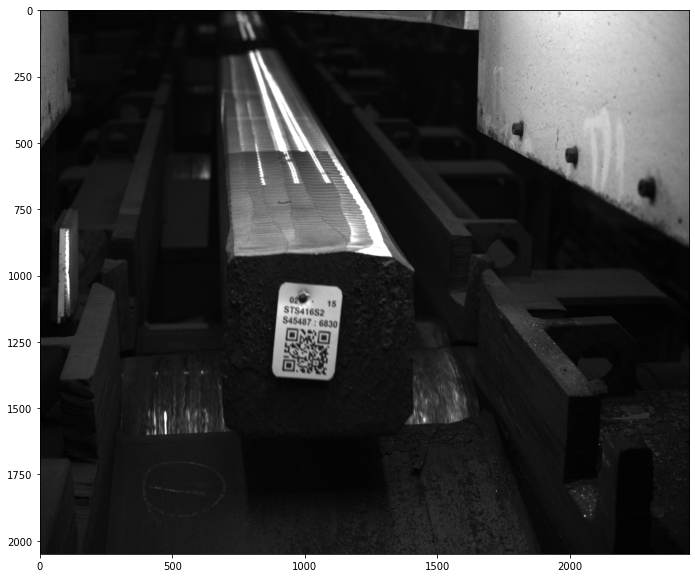

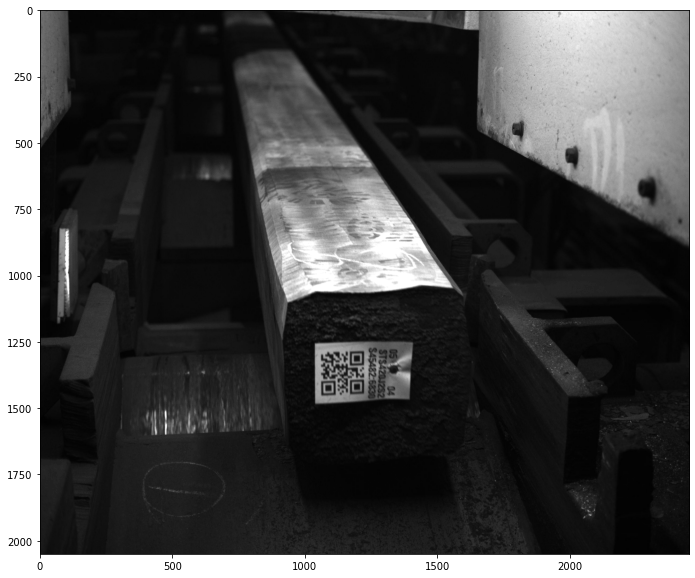

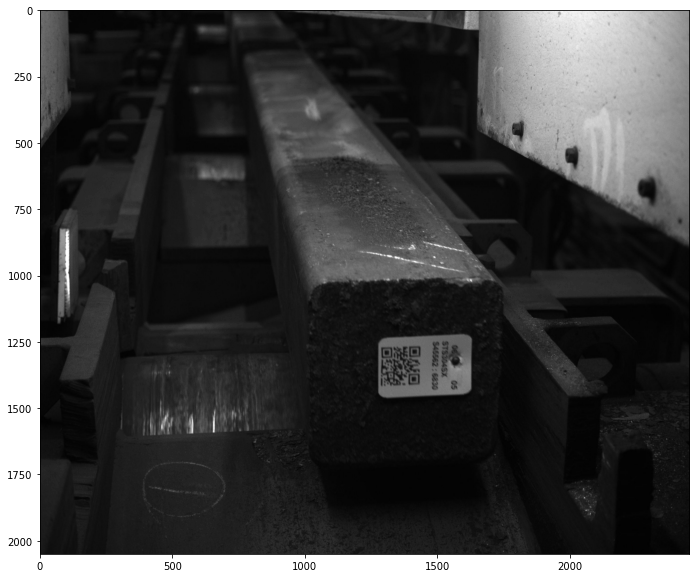

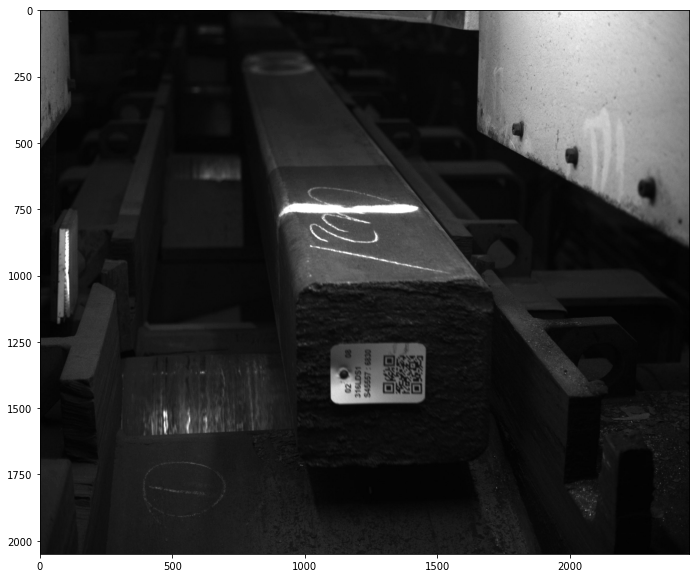

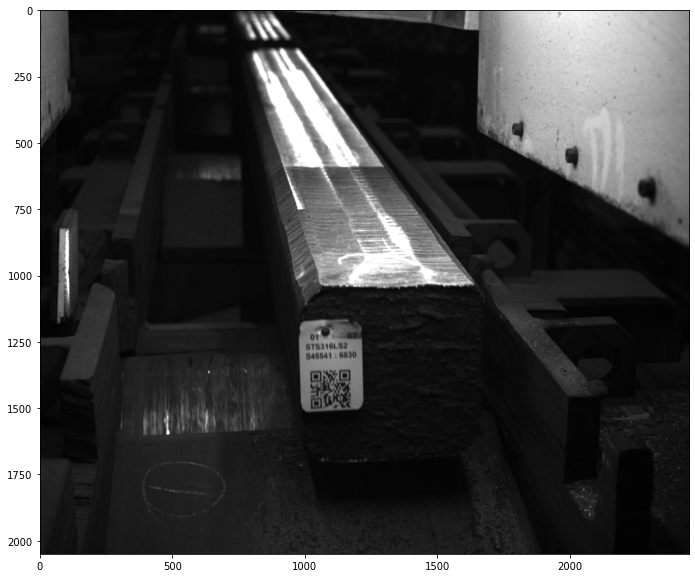

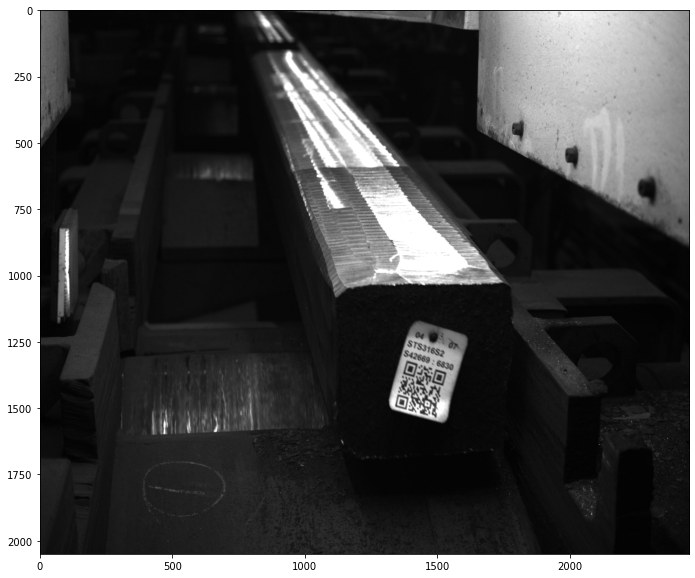

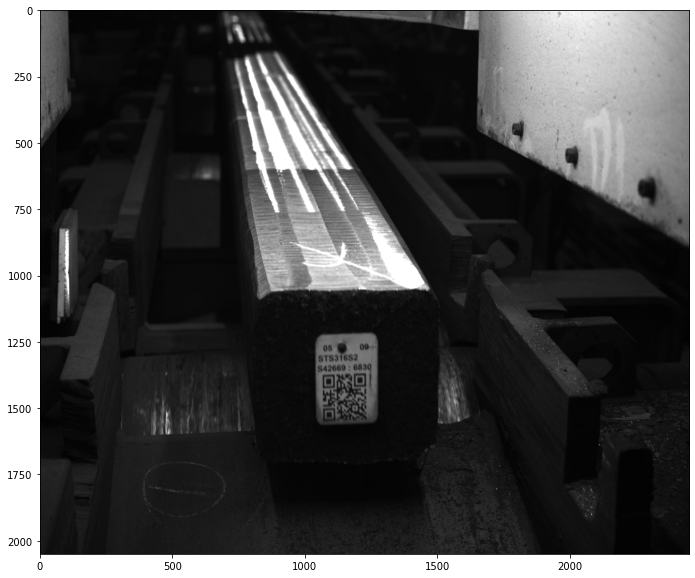

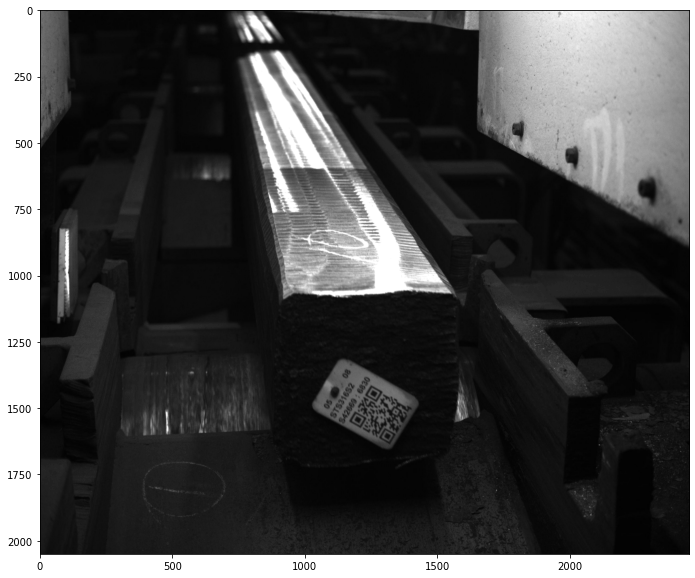

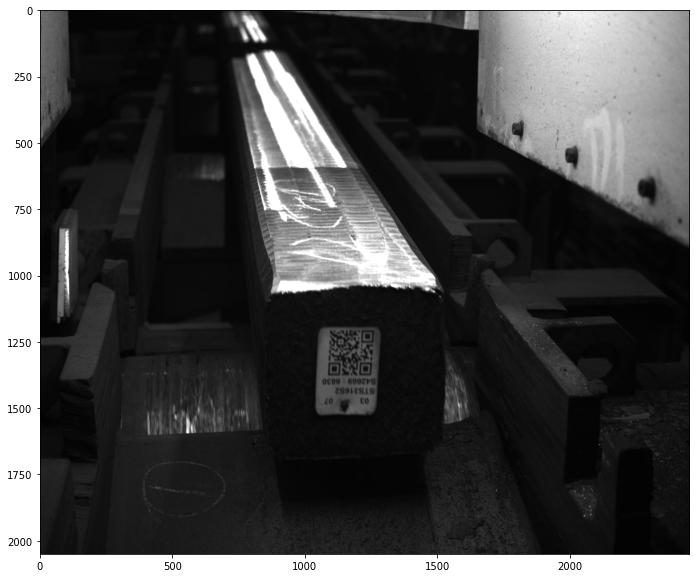

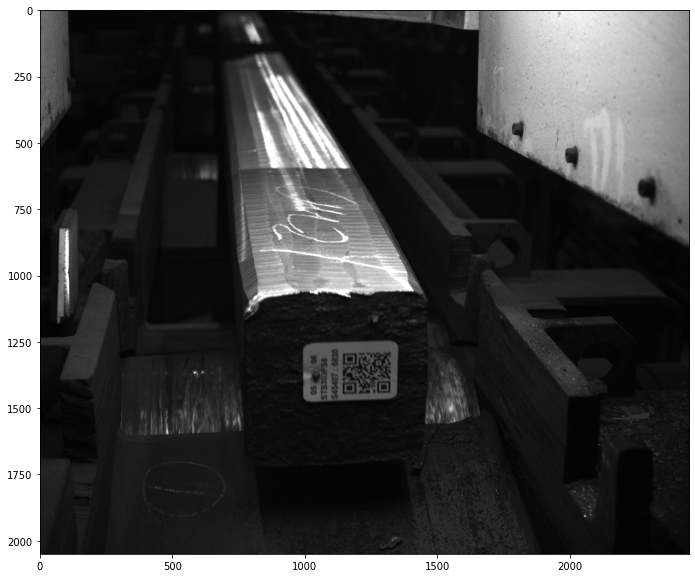

In [ ]:
path = '/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/sample/'
for i in range(10):
  #imagePath = path+'t{}.jpg'.format(i)
  print('******************* ' + str(i) + ' *************************')
  image = cv2.imread(path+'t{}.jpg'.format(i))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.figure(figsize=(12, 10))
  plt.imshow(image,cmap='gray')
  print(test_image_to_string(image))



## Opencv qrCode 인식

In [ ]:
!apt-get install -y zbar-tools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3
  libmagickwand-6.q16-3 libv4l-0 libv4lconvert0 libzbar0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x libmagickcore-6.q16-3-extra poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3
  libmagickwand-6.q16-3 libv4l-0 libv4lconvert0 libzbar0 poppler-data
  zbar-tools
0 upgraded, 19 newly installed, 0 

In [ ]:
!pip install pyqrcode

  Created wheel for pyqrcode: filename=PyQRCode-1.2.1-cp37-none-any.whl size=36245 sha256=e4cdd1f5e9d5347641b09879383a59d39808d865a93bd810f58b4dfe5354f866
  Stored in directory: /root/.cache/pip/wheels/54/61/2f/a4f51b09473db5737db0f654ed10eb9a4ee01f83a7412de349
Successfully built pyqrcode


In [ ]:
!pip install pyzbar

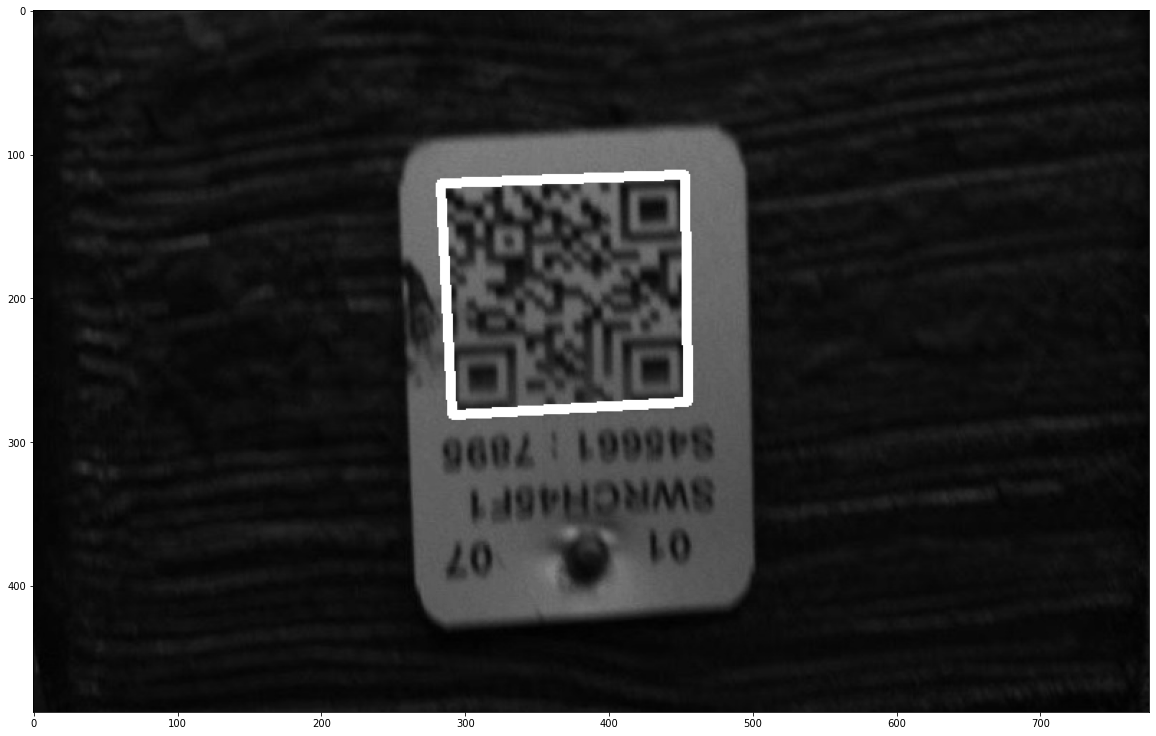

In [ ]:
import cv2

def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#image = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/testQRCode-1.png')
#image = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/20210420032509-1.jpg')
image = cv2.imread('/content/drive/Shareddrives/Data Platform 센터 (1)/AI팀/AI팀 세미나/OCR/image/20210420005317-2_c.jpg')
 
image = get_grayscale(image)
qrCodeDetector = cv2.QRCodeDetector()
 
decodedText, points, _ = qrCodeDetector.detectAndDecode(image)
 
if points is not None:
 
    nrOfPoints = len(points)
 
    for i in range(nrOfPoints):
        nextPointIndex = (i+1) % nrOfPoints
        cv2.line(image, tuple(points[i][0]), tuple(points[nextPointIndex][0]), (255,0,0), 5)
 
    print(decodedText)    
 
    plt.figure(figsize=(20, 16))
    plt.imshow(image,cmap='gray')
     
 
else:
    print("QR code not detected")